In [77]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

EJERCICIO 1

In [78]:
muestras = [76.93, 76.88, 77.07, 76.68, 76.39, 75.09, 77.67, 76.88, 78.15, 76.50, 77.16, 76.42]

In [79]:
prom_hat = np.mean(muestras).round(3)
print(prom_hat)

median_hat = np.median(muestras).round(3)
print(median_hat)

muestras2 = [n for n in muestras if n <= 76.5]
porc_hat = (len(muestras2) / len(muestras)) * 100
print(round(porc_hat,3))


76.818
76.88
33.333


EJERCICIO 2

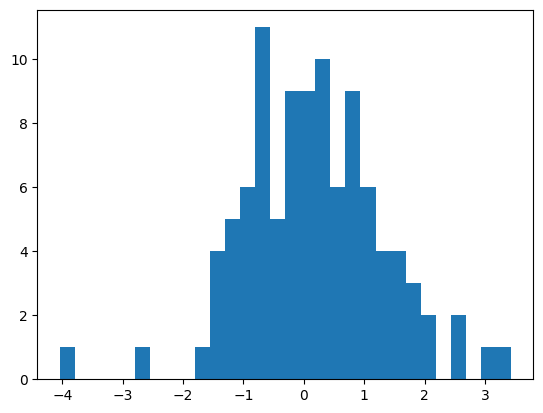

In [80]:
n = 100
X = stats.norm.rvs(loc=0, scale=1, size=n)

plt.hist(X,bins=30)
plt.show()

F_hat = stats.ecdf(X)

In [81]:
def confidence_interval_dkw(ecdf,alpha=0.05):
  L = []
  U = []
  n = len(ecdf.probabilities)
  epsilon_n = np.sqrt(np.log(2/alpha)/(2*n))
  for i in range(0,n):
    L_i = np.max([ecdf.probabilities[i]-epsilon_n,0])
    U_i = np.min([ecdf.probabilities[i]+epsilon_n,1])
    L.append(L_i)
    U.append(U_i)
  return L,U

# low,up = confidence_interval_dkw(F_hat.cdf,alpha=0.05)

# ax = plt.subplot()
# ax.step(F_hat.cdf.quantiles,low,'r--',alpha=0.5,where='post')
# ax.step(F_hat.cdf.quantiles,up,'r--',alpha=0.5,where='post')
# F_hat.cdf.plot(ax)
# ax.plot(F_hat.cdf.quantiles, stats.norm.cdf(F_hat.cdf.quantiles), color='g', label='F~N(0,1)')
# ax.set_xlabel('x')
# ax.set_ylabel(r'$\hat{F_n}(x)$')
# plt.title('Función de distribución empírica')

In [82]:
num_repetitions = 1000
n = 100

count_containing_true_cdf = 0

for _ in range(num_repetitions):
    X = stats.norm.rvs(loc=0, scale=1, size=n)

    low, up = confidence_interval_dkw(stats.ecdf(X).cdf, alpha=0.05)
    contains_true_cdf = all(low[i] <= stats.norm.cdf(stats.ecdf(X).cdf.quantiles[i]) <= up[i] for i in range(n))
    
    if contains_true_cdf:
        count_containing_true_cdf += 1

proportion_containing_true_cdf = count_containing_true_cdf / num_repetitions

print(f"La proporción de intervalos que contienen la verdadera CDF es {proportion_containing_true_cdf:.2f}")

La proporción de intervalos que contienen la verdadera CDF es 0.97


In [83]:
num_repetitions = 1000
n = 100
count_containing_true_cdf = 0

for _ in range(num_repetitions):
    X = stats.norm.rvs(loc=0, scale=1, size=n)

    mean = np.mean(X)
    se_mean = np.std(X)/np.sqrt(n)

    alpha = 0.05
    low = mean - stats.norm.ppf(1-alpha/2)*se_mean
    up = mean + stats.norm.ppf(1-alpha/2)*se_mean

    if low <= mean <= up:
        count_containing_true_cdf += 1

proportion_containing_true_cdf = count_containing_true_cdf / num_repetitions

print(f"La proporción de intervalos que contienen la media es {proportion_containing_true_cdf:.2f}")

La proporción de intervalos que contienen la media es 1.00


EJERCICIO 3


In [84]:
num_repetitions = 1000
n = 100

count_containing_true_cdf_cauchy = 0

for _ in range(num_repetitions):
    C = stats.cauchy.rvs(size = n)

    low, up = confidence_interval_dkw(stats.ecdf(C).cdf, alpha=0.05)
    contains_true_cdf = all(low[i] <= stats.cauchy.cdf(stats.ecdf(C).cdf.quantiles[i]) <= up[i] for i in range(n))
    
    if contains_true_cdf:
        count_containing_true_cdf_cauchy += 1

proportion_containing_true_cdf_cauchy = count_containing_true_cdf_cauchy / num_repetitions

print(f"La proporción de intervalos que contienen la verdadera CDF es {proportion_containing_true_cdf_cauchy:.2f}")

La proporción de intervalos que contienen la verdadera CDF es 0.95


In [85]:
num_repetitions = 1000
n = 100

count_containing_true_cdf_exp = 0
for _ in range(num_repetitions):
    E = stats.expon.rvs(size = n)

    low, up = confidence_interval_dkw(stats.ecdf(E).cdf, alpha=0.05)
    contains_true_cdf = all(low[i] <= stats.expon.cdf(stats.ecdf(E).cdf.quantiles[i]) <= up[i] for i in range(n))
    
    if contains_true_cdf:
        count_containing_true_cdf_exp += 1

proportion_containing_true_cdf_exp = count_containing_true_cdf_exp / num_repetitions

print(f"La proporción de intervalos que contienen la verdadera CDF es {proportion_containing_true_cdf_exp:.2f}")

La proporción de intervalos que contienen la verdadera CDF es 0.96


EJERCICIO 4 (VERSION CRANEO PORQUE EL DE NUEVS NO ESTABA)

Text(0.5, 0, 'Tamaño de cráneos')

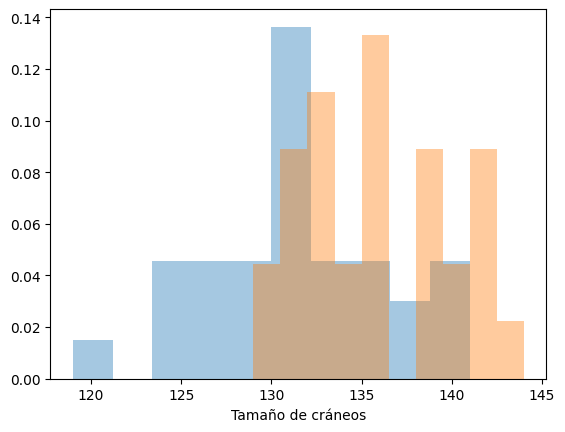

In [86]:
# theta es la diferencia de la media de cada grupo

sample = pd.read_csv('C:/Users\\Usuario\\Estadistica\\Estadistica-Inferencia/2C 2024\\clase 2/egyptians.txt', delimiter='\t')
grupo1 = sample['4000 BCE'].values
grupo2 = sample['200 BCE'].values
plt.hist(grupo1,alpha=0.4,density=True,label = '4000 BCE')
plt.hist(grupo2,alpha=0.4,density=True, label = '200 BCE')
plt.xlabel('Tamaño de cráneos')

In [87]:
g1_mean = np.mean(grupo1)
g2_mean = np.mean(grupo2)
theta_hat = g1_mean - g2_mean

se_1 = np.std(grupo1)/np.sqrt(len(grupo1))
se_2 = np.std(grupo2)/np.sqrt(len(grupo2))
se_theta = np.sqrt(se_1**2+se_2**2)
print('se(theta) = ',se_theta)

alpha = 0.05
low = mean - stats.norm.ppf(1-alpha/2)*se_theta
up = mean + stats.norm.ppf(1-alpha/2)*se_theta

print('promedio =',mean)
print('error estándar del promedio =',se_theta)
print('IC = ',[low,up])

se(theta) =  1.171861450538953
promedio = 0.12540662694104296
error estándar del promedio = 1.171861450538953
IC =  [-2.171399610986171, 2.422212864868257]


EJERCICIO 6

In [88]:
muestras = [25.11, 25.02, 25.16, 24.98, 24.83, 25.05, 24.94, 25.04, 24.99, 24.96, 25.03, 24.97, 24.93, 25.12, 25.01, 25.12, 24.90, 24.98, 25.10, 24.96]

In [89]:
mu_hat = np.mean(muestras).round(3)
print(mu_hat)

var = 0.01 ** 2 / len(muestras)
print(var)

25.01
5e-06


EJERCICIO 8


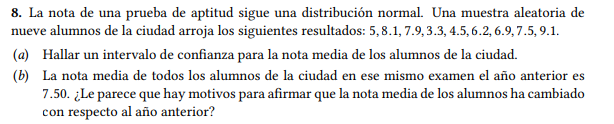

In [90]:
notas_alumnos = [5, 8.1, 7.9, 3.3, 4.5, 6.2, 6.9, 7.5, 9.1]

media = np.mean(notas_alumnos)
print(media) 

se = np.std(notas_alumnos) / np.sqrt(len(notas_alumnos))
print(se)

alpha = 0.05
low = media - stats.norm.ppf(1-alpha/2)*se
up = media + stats.norm.ppf(1-alpha/2)*se
print('IC = ',[low,up])

6.5
0.5985579378291391
IC =  [5.326847999194323, 7.673152000805677]


EJERCICIO 9


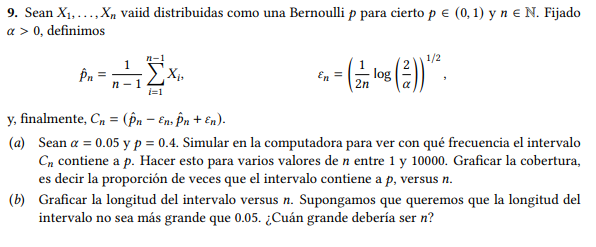

In [91]:
def proporcion_intervalo_confianza(n, bernoulli_dist, alpha=0.05):
    contador = 0
    for i in range(n):

        muestras = bernoulli_dist.rvs(n)

        p_estimado = sum(muestras) / (n-1)

        epsilon = np.sqrt(np.log(2/alpha) / (2*n))

        intervalo = [p_estimado - epsilon, p_estimado + epsilon]
        
        if intervalo[0] <= 0.4 <= intervalo[1]:
            contador += 1
            
    return contador / n


In [92]:
bernoulli_04 = stats.bernoulli(0.4)

proporcion_intervalo_confianza(1000, bernoulli_04)

0.997

Text(0.5, 1.0, 'Proporcion de p en el intervalo de confialza de n con alpha = 0.05')

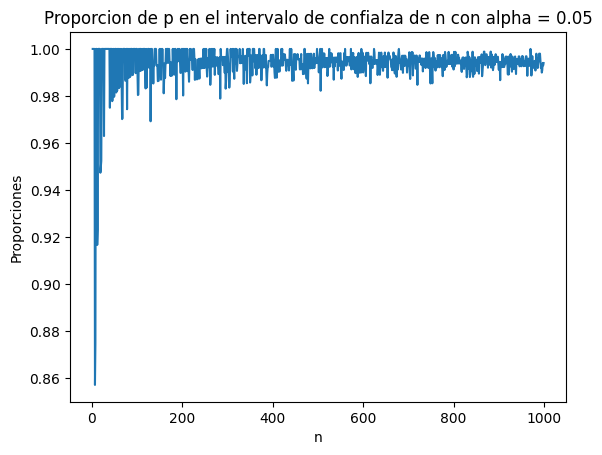

In [93]:
proporciones = [proporcion_intervalo_confianza(n, bernoulli_04) for n in range(2,1000)]

plt.plot(range(2,1000), proporciones)
plt.xlabel("n")
plt.ylabel("Proporciones")
plt.title("Proporcion de p en el intervalo de confialza de n con alpha = 0.05")